# experiment on final representations' dependency on earlier noisy decisions

convergence on earlier, false representations. 

even when the model starts with a false representation, its learning performance gradually converges. 

In [1]:
# start with one false representation, and train on the original sequence, plot KL and representation convergence

# first, test generative model on one dimensional graphs
import sys
sys.path.append('../HCM')
from Chunking_Graph import *
from main import *
import seaborn as sns

/kyb/rg/swu/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


<AxesSubplot:xlabel='N', ylabel='kl'>

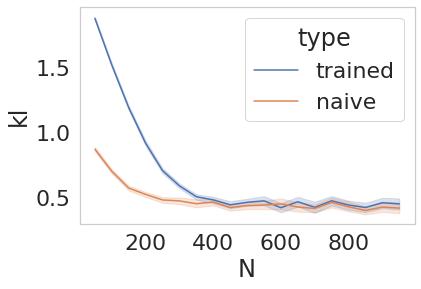

In [9]:
df = pd.read_csv('../OutputData/TransferExperiment')

sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(x="N", y="kl",hue="type",data=df[df['env'] == 'interfere'])

This one would be a convergence example when the representation is initialized as something else.  

# sensitivity to noisy observations
design a generative model where observations are sensitive to an observational error. Particularly, at each atomic location, the probability of observing one atomic unit flip is eps, we then evaluate learning performance on this noise 

a sequence produced by the generative model, but add perturbations to the resulting sequence, and observe if this type of noise-perturbed sequence

table         KL_after 100 steps          KL after 1000 steps
eps: 0
eps: 0.001
eps: 0.01       
eps: 0.1

ideally, you want to plot the deviation of KL with respect to the samples in the no perturbation curve 

In [34]:
dfeps = pd.read_csv('../OutputData/sensitivity_analysis')


In [35]:
dfeps[(dfeps['d'] == 5)&(dfeps['N'] == 300)]

,Unnamed: 0,N,kl,type,d,eps
188,188,300,0.133425,ck,5,0.000
189,189,300,0.326435,ck,5,0.001
190,190,300,0.471461,ck,5,0.010
191,191,300,0.373716,ck,5,0.100
224,224,300,0.105563,ck,5,0.000
225,225,300,0.230928,ck,5,0.001
226,226,300,0.154469,ck,5,0.010
227,227,300,0.205223,ck,5,0.100
260,260,300,0.370149,ck,5,0.000
261,261,300,0.670626,ck,5,0.001


Text(0.5, 1.0, 'd = 3')

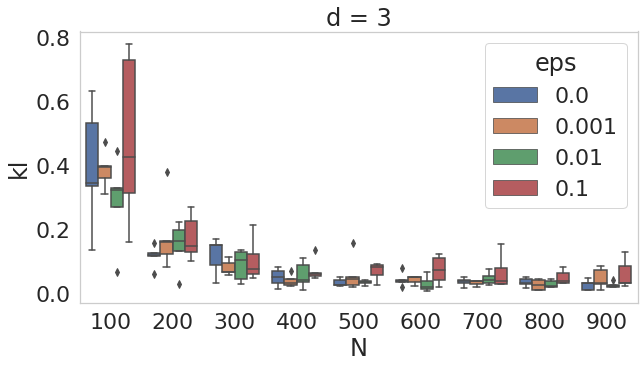

In [36]:
# Draw a nested boxplot to show bills by day and time
plt.figure(figsize = (10,5))
sns.boxplot(x="N", y="kl",
            hue="eps",
            data=dfeps[dfeps['d'] == 3])
plt.title('d = 3')

Text(0.5, 1.0, 'd = 5')

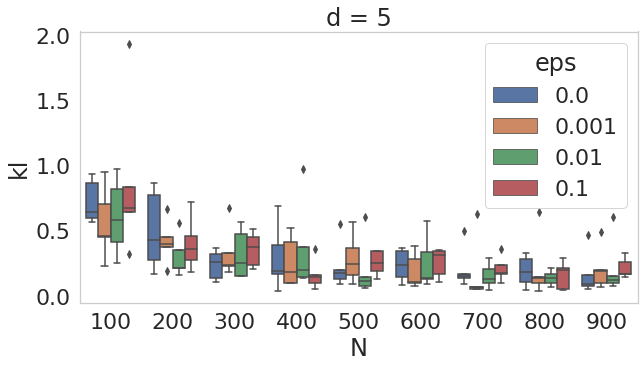

In [37]:
# Draw a nested boxplot to show bills by day and time
plt.figure(figsize = (10,5))
sns.boxplot(x="N", y="kl",
            hue="eps",
            data=dfeps[dfeps['d'] == 5])
plt.title('d = 5')

Text(0.5, 1.0, 'd = 8')

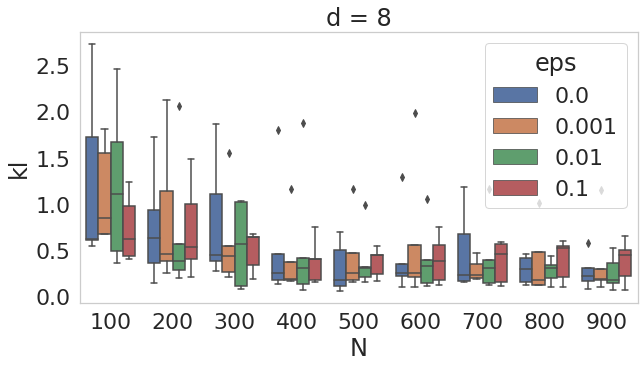

In [38]:
# Draw a nested boxplot to show bills by day and time
plt.figure(figsize = (10,5))
sns.boxplot(x="N", y="kl",
            hue="eps",
            data=dfeps[dfeps['d'] == 8])
plt.title('d = 8')

# sensitivity to phase shift

phaseshift step     KL after 100 steps      KL after 1000
1
2
3
4
5
6
7
8
9
10



In [33]:
dfps = pd.read_csv('../OutputData/phase_shift_analysis')


In [39]:
dfps

,Unnamed: 0,N,kl,type,d,phase_shift
0,0,100,0.326555,hcm,5,0
1,1,100,0.316978,hcm,5,1
2,2,100,0.433762,hcm,5,2
3,3,100,0.605612,hcm,5,3
4,4,100,0.393008,hcm,5,4
...,...,...,...,...,...,...
895,895,900,0.073091,hcm,5,15
896,896,900,0.058166,hcm,5,16
897,897,900,0.078656,hcm,5,17
898,898,900,0.029155,hcm,5,18


Text(0.5, 1.0, 'Phase Shift Analysis')

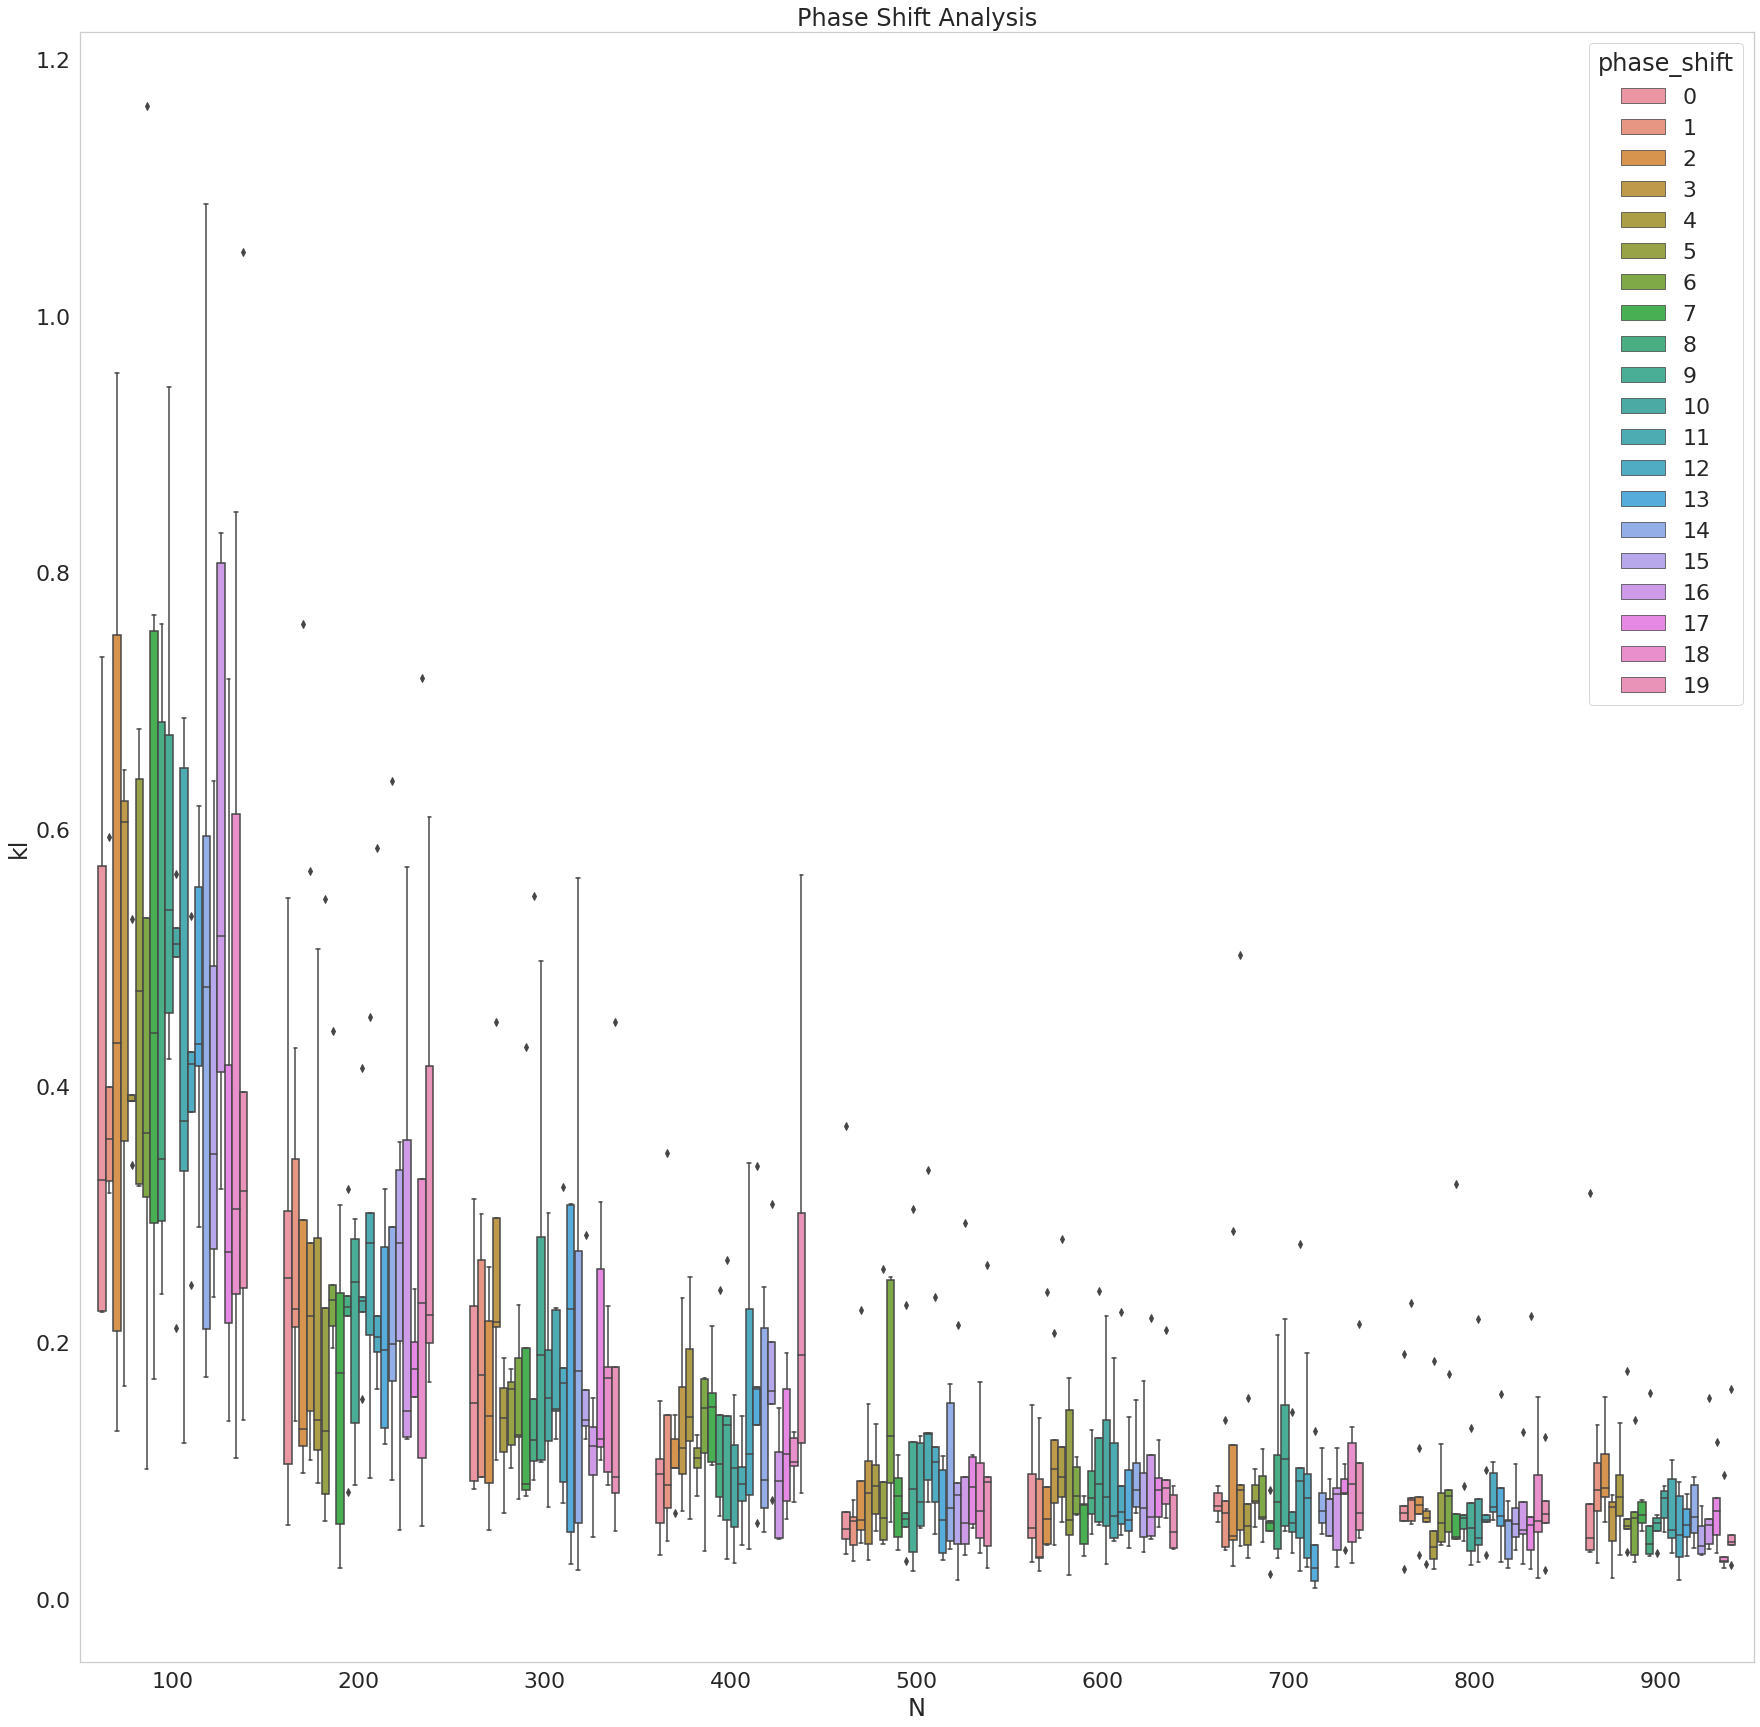

In [44]:
plt.figure(figsize = (30,30))
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="N", y="kl",
            hue="phase_shift",
            data=dfps)
plt.title('Phase Shift Analysis')